Notebook author: Makar Shevchenko B20-DS-01

# Data Exploration and Preprocessing. Movie Recommender System. Assignment 2. Practical Machine Learning and Deep Learning

## Solution

### Imports

In [31]:
!pip install wget

import os
from zipfile import ZipFile

import wget
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

### Config

In [3]:
DATA_URL = "https://files.grouplens.org/datasets/movielens/ml-100k.zip"
ZIP_SAVE_PATH = "./ml-100k.zip"
SAVE_DIR_PATH = "."
UNZIPPED_DIR_PATH = "./ml-100k"
U_DATA_PATH = UNZIPPED_DIR_PATH + "/u.data"
U_INFO_PATH = UNZIPPED_DIR_PATH + "/u.info"
U_ITEM_PATH = UNZIPPED_DIR_PATH + "/u.item"
U_GENRE_PATH = UNZIPPED_DIR_PATH + "/u.genre"
U_USER_PATH = UNZIPPED_DIR_PATH + "/u.user"
U_OCCUP_PATH = UNZIPPED_DIR_PATH + "/u.occupation"
UX_BASE_PATH_F = UNZIPPED_DIR_PATH + "/u{}.base"
UX_TEST_PATH_F = UNZIPPED_DIR_PATH + "/u{}.test"
ALLBUT_PATH = UNZIPPED_DIR_PATH + "/allbut.pl"
MKU_PATH = UNZIPPED_DIR_PATH + "/mku.sh"
U_N_NUM = 5
USER_ID = "user_id"
ITEM_ID = "item_id"
RATING = "rating"
TS = "timestamp"
U_DATA_COL_NMS = [USER_ID, ITEM_ID, RATING, TS]
MOV_ID = "movie_id"
MOV_TITLE = "movie_title"
REL_DATE = "release_date"
VID_REL_DATE = "video_release_date"
IMDB_URL = "IMDb_URL"
GEN_UNK = "unknown"
GEN_ACT = "Action"
GEN_ADV = "Adventure"
GEN_ANIM = "Animation"
GEN_CHLD = "Children's"
GEN_CMDY = "Comedy"
GEN_CRM = "Crime"
GEN_DOC = "Documentary"
GEN_DRM = "Drama"
GEN_FNTS = "Fantasy"
GEN_NOIR = "Film-Noir"
GEN_HRR = "Horror"
GEN_MUS = "Musical"
GEN_MSTR = "Mystery"
GEN_RMNS = "Romance"
GEN_SCIFI = "Sci-Fi"
GEN_TRIL = "Thriller"
GEN_WAR = "War"
GEN_WST = "Western"
U_ITEM_COL_NMS = [MOV_ID, MOV_TITLE, REL_DATE, VID_REL_DATE, IMDB_URL, GEN_UNK,
                  GEN_ACT, GEN_ADV, GEN_ANIM, GEN_CHLD, GEN_CMDY, GEN_CRM,
                  GEN_DOC, GEN_DRM, GEN_FNTS, GEN_NOIR, GEN_HRR, GEN_MUS,
                  GEN_MSTR, GEN_RMNS, GEN_SCIFI, GEN_TRIL, GEN_WAR, GEN_WST]
AGE = "age"
GENDER = "gender"
OCCUPTN = "occupation"
ZIP_CODE = "zip_code"
U_USER_COL_NMS = [USER_ID, AGE, GENDER, OCCUPTN, ZIP_CODE]
FILES_ENC = "latin-1"
REL_YEAR = "release_year"

### Data Understanding

#### Data Collection

In [4]:
if not os.path.isfile(UNZIPPED_DIR_PATH):
    wget.download(DATA_URL, ZIP_SAVE_PATH)
    with ZipFile(ZIP_SAVE_PATH, "r") as zip_file:
        zip_file.extractall(SAVE_DIR_PATH)
    os.remove(ZIP_SAVE_PATH)

u_data = pd.read_csv(U_DATA_PATH, sep="\t", encoding=FILES_ENC, header=None,
                     names=U_DATA_COL_NMS)

name2num = dict()
u_info = pd.read_csv(U_INFO_PATH, sep=" ", encoding=FILES_ENC, header=None)
for i, col in u_info.iterrows():
    name2num[col[1]] = col[0]

u_item = pd.read_csv(U_ITEM_PATH, sep="|", encoding=FILES_ENC, header=None,
                     names=U_ITEM_COL_NMS)
u_item.release_date = pd.to_datetime(u_item.release_date)
u_item[REL_YEAR] = u_item[REL_DATE].dt.year

gen2idx = dict()
u_genre = pd.read_csv(U_GENRE_PATH, sep="|", encoding=FILES_ENC, header=None)
for i, col in u_genre.iterrows():
    gen2idx[col[0]] = col[1]

u_user = pd.read_csv(U_USER_PATH, sep="|", encoding=FILES_ENC, header=None,
                     names=U_USER_COL_NMS)

occups = set()
u_occup = pd.read_csv(U_OCCUP_PATH, encoding=FILES_ENC, header=None)
for i, col in u_occup.iterrows():
    occups.add(col[0])

u_n_bases = []
for i in range(1, U_N_NUM+1):
    u_n_bases.append(pd.read_csv(UX_BASE_PATH_F.format(i), sep="\t",
                                 encoding=FILES_ENC, header=None,
                                 names=U_DATA_COL_NMS))

u_n_tests = []
for i in range(1, U_N_NUM+1):
    u_n_tests.append(pd.read_csv(UX_TEST_PATH_F.format(i), sep="\t",
                                 encoding=FILES_ENC, header=None,
                                 names=U_DATA_COL_NMS))

Skip training/test sets generating scripts mku.sh and allbut.pl as the sets are already present.

#### Data Description

In [5]:
print(u_data.info())
u_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    100000 non-null  int64
 1   item_id    100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB
None


,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [6]:
name2num

{'users': 943, 'items': 1682, 'ratings': 100000}

In [7]:
print(u_item.info())
u_item

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_id            1682 non-null   int64         
 1   movie_title         1682 non-null   object        
 2   release_date        1681 non-null   datetime64[ns]
 3   video_release_date  0 non-null      float64       
 4   IMDb_URL            1679 non-null   object        
 5   unknown             1682 non-null   int64         
 6   Action              1682 non-null   int64         
 7   Adventure           1682 non-null   int64         
 8   Animation           1682 non-null   int64         
 9   Children's          1682 non-null   int64         
 10  Comedy              1682 non-null   int64         
 11  Crime               1682 non-null   int64         
 12  Documentary         1682 non-null   int64         
 13  Drama               1682 non-null   int64       

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
0,1,Toy Story (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1995.0
1,2,GoldenEye (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
2,3,Four Rooms (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
3,4,Get Shorty (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995.0
4,5,Copycat (1995),1995-01-01,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1995.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,1678,Mat' i syn (1997),1998-02-06,NaN,http://us.imdb.com/M/title-exact?Mat%27+i+syn+...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1998.0
1678,1679,B. Monkey (1998),1998-02-06,NaN,http://us.imdb.com/M/title-exact?B%2E+Monkey+(...,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1998.0
1679,1680,Sliding Doors (1998),1998-01-01,NaN,http://us.imdb.com/Title?Sliding+Doors+(1998),0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1998.0
1680,1681,You So Crazy (1994),1994-01-01,NaN,http://us.imdb.com/M/title-exact?You%20So%20Cr...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1994.0


In [8]:
gen2idx

{'unknown': 0,
 'Action': 1,
 'Adventure': 2,
 'Animation': 3,
 "Children's": 4,
 'Comedy': 5,
 'Crime': 6,
 'Documentary': 7,
 'Drama': 8,
 'Fantasy': 9,
 'Film-Noir': 10,
 'Horror': 11,
 'Musical': 12,
 'Mystery': 13,
 'Romance': 14,
 'Sci-Fi': 15,
 'Thriller': 16,
 'War': 17,
 'Western': 18}

In [9]:
print(u_user.info())
u_user

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


In [10]:
occups

{'administrator',
 'artist',
 'doctor',
 'educator',
 'engineer',
 'entertainment',
 'executive',
 'healthcare',
 'homemaker',
 'lawyer',
 'librarian',
 'marketing',
 'none',
 'other',
 'programmer',
 'retired',
 'salesman',
 'scientist',
 'student',
 'technician',
 'writer'}

In [11]:
print(f"u_n_bases number: {U_N_NUM}")
print(u_n_bases[U_N_NUM-1].info())
u_n_bases[U_N_NUM-1]

u_n_bases number: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   user_id    80000 non-null  int64
 1   item_id    80000 non-null  int64
 2   rating     80000 non-null  int64
 3   timestamp  80000 non-null  int64
dtypes: int64(4)
memory usage: 2.4 MB
None


,user_id,item_id,rating,timestamp
0,1,1,5,874965758
1,1,2,3,876893171
2,1,4,3,876893119
3,1,5,3,889751712
4,1,6,5,887431973
...,...,...,...,...
79995,943,943,5,888639614
79996,943,1011,2,875502560
79997,943,1067,2,875501756
79998,943,1074,4,888640250


In [12]:
print(f"u_n_tests number: {U_N_NUM}")
print(u_n_tests[U_N_NUM-1].info())
u_n_tests[U_N_NUM-1]

u_n_tests number: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   user_id    20000 non-null  int64
 1   item_id    20000 non-null  int64
 2   rating     20000 non-null  int64
 3   timestamp  20000 non-null  int64
dtypes: int64(4)
memory usage: 625.1 KB
None


,user_id,item_id,rating,timestamp
0,1,3,4,878542960
1,1,13,5,875071805
2,1,15,5,875071608
3,1,18,4,887432020
4,1,19,5,875071515
...,...,...,...,...
19995,943,1028,2,875502096
19996,943,1044,3,888639903
19997,943,1047,2,875502146
19998,943,1228,3,888640275


#### Data Exploration

##### U Data

In [13]:
u_data.describe()

,user_id,item_id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


Text(0.5, 0, 'Timestamp')

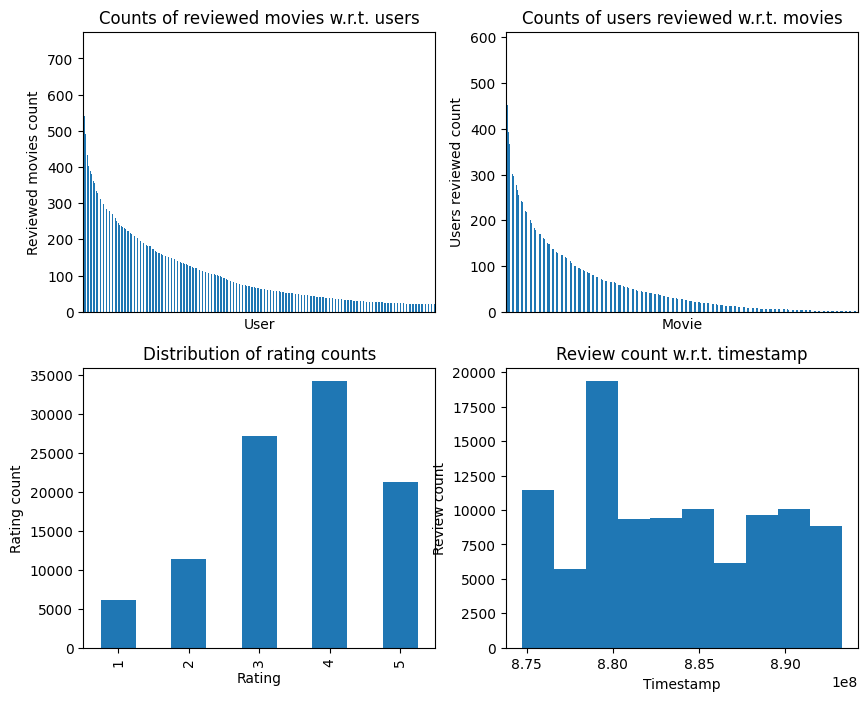

In [35]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
u_data[USER_ID].value_counts().plot(kind='bar', ax=axes[0][0])
axes[0][0].tick_params(axis='x', which='both', bottom=False, top=False,
                       labelbottom=False)
axes[0][0].title.set_text("Counts of reviewed movies w.r.t. users")
axes[0][0].set_ylabel('Reviewed movies count')
axes[0][0].set_xlabel('User')
u_data[ITEM_ID].value_counts().plot(kind='bar', ax=axes[0][1])
axes[0][1].tick_params(axis='x', which='both', bottom=False, top=False,
                       labelbottom=False)
axes[0][1].title.set_text('Counts of users reviewed w.r.t. movies')
axes[0][1].set_ylabel('Users reviewed count')
axes[0][1].set_xlabel('Movie')
u_data[RATING].value_counts().sort_index().plot(kind='bar', ax=axes[1][0])
axes[1][0].title.set_text('Distribution of rating counts')
axes[1][0].set_ylabel('Rating count')
axes[1][0].set_xlabel('Rating')
axes[1][1].hist(u_data[TS])
axes[1][1].title.set_text('Review count w.r.t. timestamp')
axes[1][1].set_ylabel('Review count')
axes[1][1].set_xlabel('Timestamp')

##### U Item

In [15]:
u_item.describe()

,movie_id,video_release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
count,1682.000000,0.0,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,...,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1681.00000
mean,841.500000,NaN,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,0.029727,...,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052,1989.38608
std,485.695893,NaN,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,0.169882,...,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714,14.25358
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1922.00000
25%,421.250000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1993.00000
50%,841.500000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1995.00000
75%,1261.750000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1996.00000
max,1682.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1998.00000


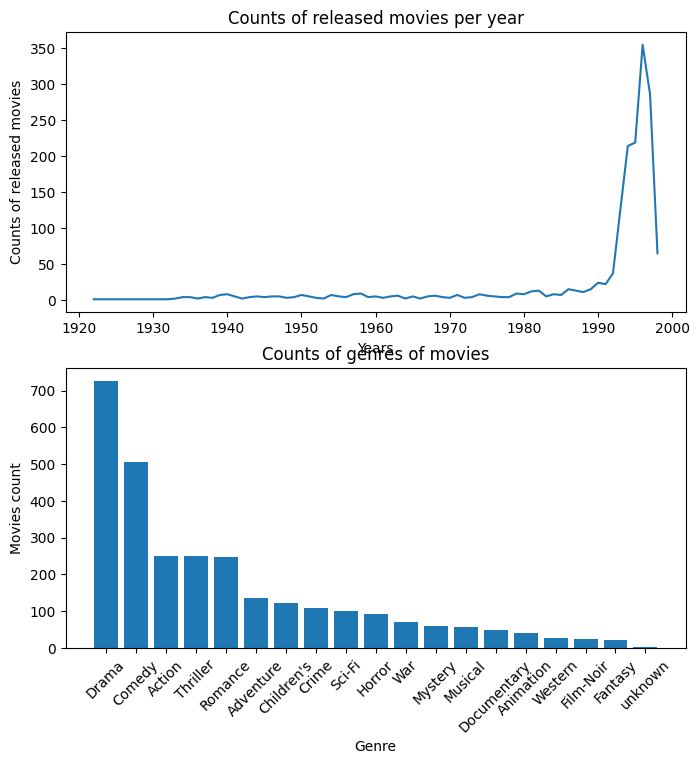

In [16]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(8, 8))
rd_vc = u_item[REL_DATE].dt.year.value_counts().sort_index()
axes[0].plot(rd_vc.index, rd_vc.values)
axes[0].title.set_text("Counts of released movies per year")
axes[0].set_ylabel('Counts of released movies')
axes[0].set_xlabel('Years')
gen_vc = u_item.loc[:, gen2idx.keys()].sum().sort_values(ascending=False)
axes[1].bar(gen_vc.index, gen_vc.values)
axes[1].title.set_text("Counts of genres of movies")
axes[1].set_ylabel('Movies count')
axes[1].set_xlabel('Genre')
axes[1].tick_params("x", labelrotation=45)

<ipython-input-17-8b3d5aa4bbf2>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.heatmap(u_item.groupby(REL_YEAR).sum()[gen2idx.keys()].T, cmap='YlGnBu')


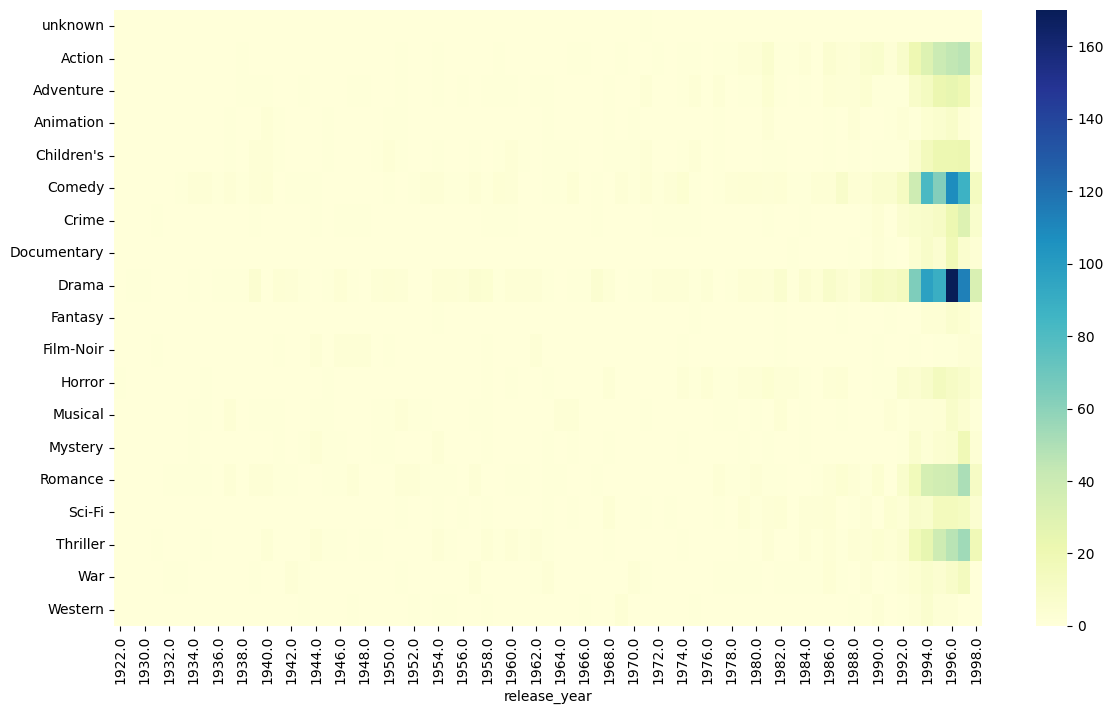

In [17]:
plt.figure(figsize=(14,8))
sns.heatmap(u_item.groupby(REL_YEAR).sum()[gen2idx.keys()].T, cmap='YlGnBu')
plt.show()

##### U User

In [18]:
u_item.describe()

,movie_id,video_release_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year
count,1682.000000,0.0,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,...,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1681.00000
mean,841.500000,NaN,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,0.029727,...,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052,1989.38608
std,485.695893,NaN,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,0.169882,...,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714,14.25358
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1922.00000
25%,421.250000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1993.00000
50%,841.500000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1995.00000
75%,1261.750000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1996.00000
max,1682.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1998.00000


In [19]:
print(u_user.info())
u_user

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB
None


,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213
...,...,...,...,...,...
938,939,26,F,student,33319
939,940,32,M,administrator,02215
940,941,20,M,student,97229
941,942,48,F,librarian,78209


Text(0.5, 0, 'Occupation')

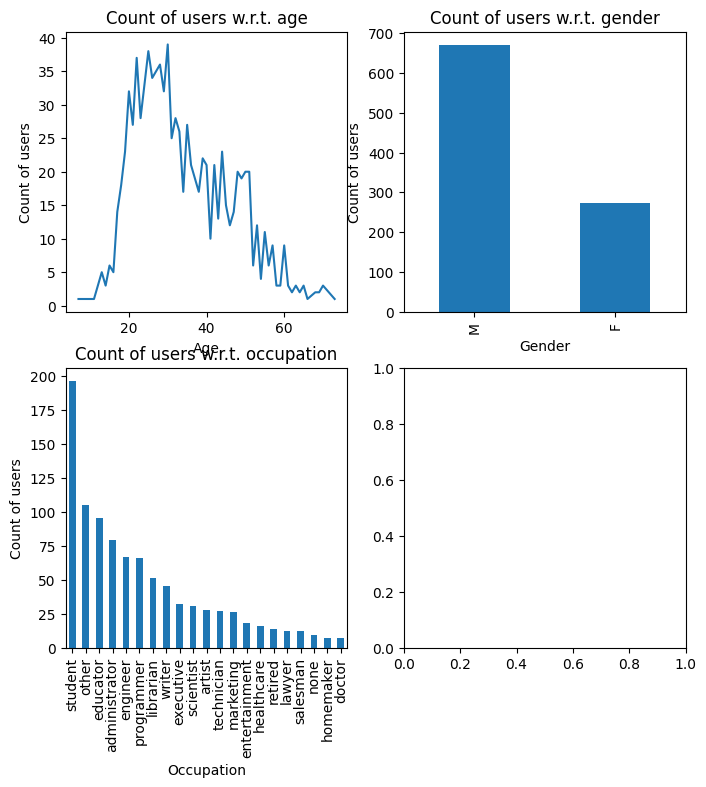

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
age_vc = u_user[AGE].value_counts().sort_index()
axes[0][0].plot(age_vc.index, age_vc.values)
axes[0][0].title.set_text("Count of users w.r.t. age")
axes[0][0].set_ylabel('Count of users')
axes[0][0].set_xlabel('Age')
u_user[GENDER].value_counts().plot(kind='bar', ax=axes[0][1])
axes[0][1].title.set_text("Count of users w.r.t. gender")
axes[0][1].set_ylabel('Count of users')
axes[0][1].set_xlabel('Gender')
u_user[OCCUPTN].value_counts().plot(kind='bar', ax=axes[1][0])
axes[1][0].title.set_text("Count of users w.r.t. occupation")
axes[1][0].set_ylabel('Count of users')
axes[1][0].set_xlabel('Occupation')

#### Data Quality Verifiaction

##### U Data

In [21]:
u_data.isnull().sum() * 100 / len(u_data)

user_id      0.0
item_id      0.0
rating       0.0
timestamp    0.0
dtype: float64

In [24]:
u_data[u_data.duplicated(keep=False)]

,user_id,item_id,rating,timestamp


##### U Item

In [22]:
u_item.isnull().sum() * 100 / len(u_item)

movie_id                0.000000
movie_title             0.000000
release_date            0.059453
video_release_date    100.000000
IMDb_URL                0.178359
unknown                 0.000000
Action                  0.000000
Adventure               0.000000
Animation               0.000000
Children's              0.000000
Comedy                  0.000000
Crime                   0.000000
Documentary             0.000000
Drama                   0.000000
Fantasy                 0.000000
Film-Noir               0.000000
Horror                  0.000000
Musical                 0.000000
Mystery                 0.000000
Romance                 0.000000
Sci-Fi                  0.000000
Thriller                0.000000
War                     0.000000
Western                 0.000000
release_year            0.059453
dtype: float64

In [25]:
u_item[u_item.duplicated(keep=False)]

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown,Action,Adventure,Animation,Children's,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_year


##### U User

In [23]:
u_user.isnull().sum() * 100 / len(u_user)

user_id       0.0
age           0.0
gender        0.0
occupation    0.0
zip_code      0.0
dtype: float64

In [26]:
u_user[u_user.duplicated(keep=False)]

,user_id,age,gender,occupation,zip_code


### Data Preparation

#### Data Selection

#### Data Cleaning

#### Data Construction

#### Data Integration

#### Data Formatting

### References

```
F. Maxwell Harper and Joseph A. Konstan. 2015. The MovieLens Datasets:
History and Context. ACM Transactions on Interactive Intelligent
Systems (TiiS) 5, 4, Article 19 (December 2015), 19 pages.
DOI=http://dx.doi.org/10.1145/2827872

https://www.kaggle.com/code/amar09/eda-recommendation-model-on-movielens-100k

https://www.kaggle.com/code/trishna8/movielens-100k-exploratory-data-analysis
```